In [1]:
import matplotlib
import tensorflow as tf
import tensorflow_datasets as tfds
import random
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import *

In [2]:
matplotlib.rcParams['figure.figsize'] = [10, 7]
np.set_printoptions(precision=3, suppress=True)

# Hyperparameters
seed = 22
tf.random.set_seed(seed)
random.seed(a=seed)
hidden_neurons = 128
number_of_hidden_layers = 1
batch_size = 128
learning_rate = 0.001
max_epochs = 50
k = 10

In [3]:
def plot_graph(data_set, date_time_plot):
    plot_cols = ['New_cases', 'New_deaths']
    plot_features = data_set[plot_cols]
    plot_features.index = date_time_plot
    _ = plot_features.plot(subplots=True)
    plt.show()

In [4]:
# Collecting and pre-processing the data to eliminate unused columns
covid = pd.read_csv("WHO-COVID-19-global-data.csv")
_ = covid.pop('Cumulative_cases')
_ = covid.pop('Cumulative_deaths')
_ = covid.pop('Country_code')
_ = covid.pop('WHO_region')

In [5]:
# Defining country and time span
country = 'Brazil'
train_start_date = '2022-01-01'
train_end_date = '2022-04-30'
test_start_date = '2022-05-01'
test_end_date = '2022-05-31'

In [6]:
# Selecting important data based on date and country and finishing cleaning up the data
train_df = covid.query('Date_reported >= @train_start_date and Date_reported <= @train_end_date and Country == @country')
test_df = covid.query('Date_reported >= @test_start_date and Date_reported <= @test_end_date and Country == @country')
_ = train_df.pop('Country')
_ = test_df.pop('Country')

In [7]:
date_time_train = pd.to_datetime(train_df.pop('Date_reported'), format='%Y-%m-%d')
date_time_test = pd.to_datetime(test_df.pop('Date_reported'), format='%Y-%m-%d')

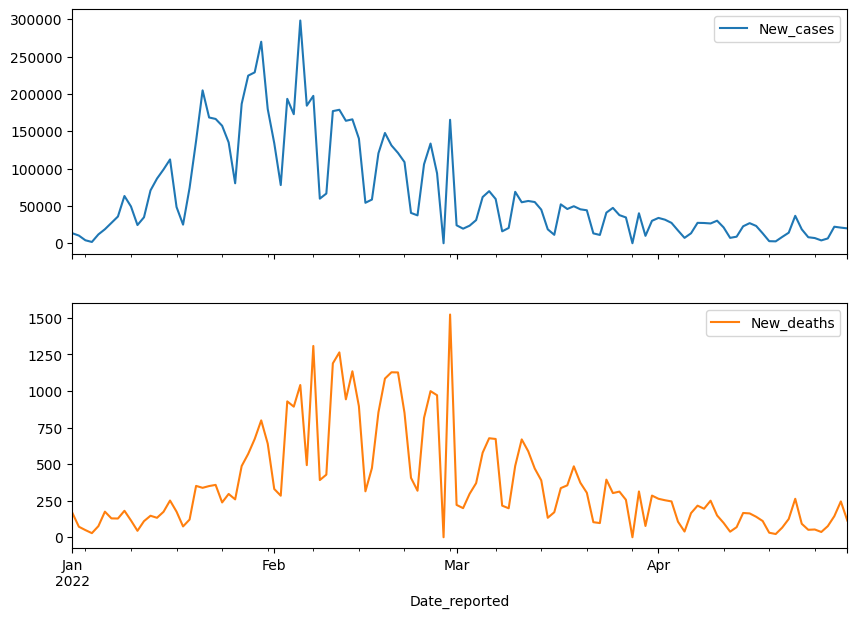

In [8]:
plot_graph(train_df, date_time_train)

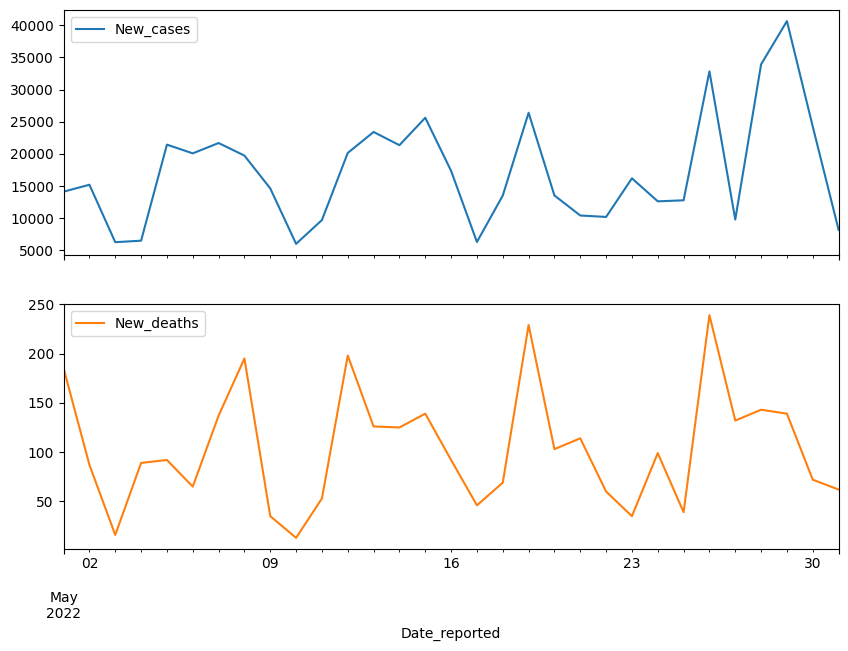

In [9]:
plot_graph(test_df, date_time_test)

In [20]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
New_cases,120.0,67959.050000,66617.210513,0.0,19816.00,40823.0,106513.25,298408.0
New_deaths,120.0,370.066667,339.342734,0.0,127.25,257.5,485.50,1523.0


In [21]:
data = train_df.pop('New_cases')
target = train_df.pop('New_deaths')
test = test_df.pop('New_cases')

In [29]:
train_mean = data.mean()
train_std = data.std()

data = (data - train_mean) / train_std